In [1]:
import PIL.Image as pil

In [2]:
img_path = "/userhome/34/h3567721/dataset/kitti/kitti_depth_test_eigen/2011_09_26_drive_0023_sync_02/0000000180.jpg"

In [3]:
fh = open(img_path, 'r')

In [4]:
raw_im = pil.open(fh)

In [6]:
raw_im.size

(1248, 128)

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

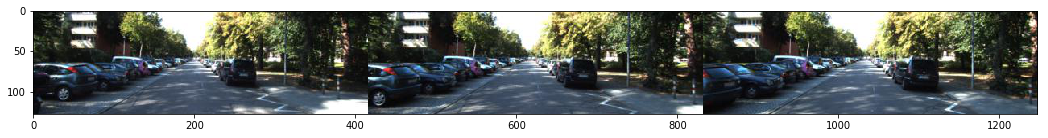

In [10]:
plt.figure(figsize=(18,6))
plt.imshow(raw_im)

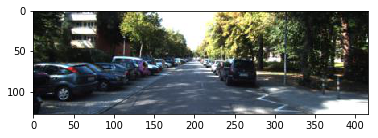

In [15]:
plt.imshow(raw_im.crop((0,0,416,128)))

In [29]:
raw_im.crop((0,0,416,128)).size

(416, 128)

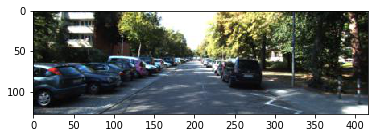

In [19]:
plt.imshow(raw_im.crop((416,0,416*2,128)))

In [32]:
type(raw_im.crop((0,0,416,128)))

PIL.Image.Image

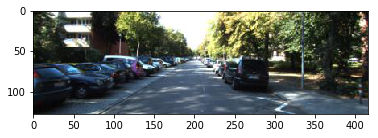

In [27]:
plt.imshow(raw_im.crop((416*2,0,416*3,128)))

In [34]:
img = np.array(raw_im.crop((416,0,416*2,128)))

In [37]:
img.shape

(128, 416, 3)

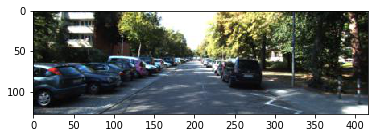

In [38]:
plt.imshow(img)

In [39]:
im_src_1 = np.array(raw_im.crop((0,0,416,128)))

In [40]:
im_src_2 = np.array(raw_im.crop((416*2,0,416*3,128)))

In [49]:
im_srcs = np.concatenate([im_src_1, im_src_2], axis=2)

In [50]:
im_srcs.shape

(128, 416, 6)

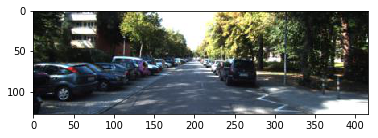

In [52]:
plt.imshow(im_srcs[:,:,0:3])

In [53]:
intrinsic_path = "/userhome/34/h3567721/dataset/kitti/kitti_depth_test_eigen/2011_09_26_drive_0023_sync_02/0000000180_cam.txt"

In [76]:
with open(intrinsic_path, 'r') as f:
    intrinsirc_raw = f.readline()

In [77]:
intrinsirc_mat = np.array([float(num) for num in intrinsirc_raw.split(",")])

In [78]:
intrinsirc_mat = intrinsirc_mat.reshape(3,3)

In [79]:
intrinsirc_mat[0][0]

241.674463

In [80]:
intrinsirc_mat

array([[241.674463,   0.      , 204.16801 ],
       [  0.      , 246.284868,  59.000832],
       [  0.      ,   0.      ,   1.      ]])

In [81]:
def make_intrinsics_matrix(fx, fy, cx, cy):
    r1 = [fx, 0., cx]
    r2 = [0., fy, cy]
    r3 = [0., 0., 1.]

    return np.array([r1,r2,r3])

In [86]:
def get_multi_scale_intrinsics(intrinsics, num_scales):
    # num_scales = 4
    intrinsics_mscale = []
    # Scale the intrinsics accordingly for each scale
    # 2**0=1, 2**1=2, 2**3=8, 2**4=16
    for s in range(num_scales):
        fx = intrinsics[0, 0]/(2 ** s)
        fy = intrinsics[1, 1]/(2 ** s)
        cx = intrinsics[0, 2]/(2 ** s)
        cy = intrinsics[1, 2]/(2 ** s)
        
        intrinsics_mscale.append(make_intrinsics_matrix(fx, fy, cx, cy))

    intrinsics_mscale = np.stack(intrinsics_mscale, axis=0)

    return intrinsics_mscale


In [87]:
in_mm = get_multi_scale_intrinsics(intrinsirc_mat,4)

In [88]:
in_mm.shape

(4, 3, 3)